In [1]:
import numpy as np
import xarray as xr
import os.path as op
from xmitgcm import open_mdsdataset
import xgcm.grid as xgd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ddir = '/swot/SUM05/takaya/MITgcm/channel/runs/res10km_2804_nutrientoutputs/'

In [9]:
259200/5
1036944+51840

1088784

In [13]:
ds = open_mdsdataset(ddir, grid_dir=op.join(ddir,'../'),
                     iters=range(1036944,1296144,144),
                     prefix=['FeT_tave','NO3_tave','PO4_tave','SiO2_tave'], 
                     delta_t=6e2
                    )
ds

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 100, XG: 100, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
  * XC        (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * YC        (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * XG        (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * YG        (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA        (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dxG       (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dyG       (YC, XG) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth     (YC

In [14]:
po4 = ds.TRAC01
no3 = ds.TRAC02
fe = ds.TRAC03
sio2 = ds.TRAC04

In [22]:
ds.TRAC04.attrs

OrderedDict([('standard_name', 'TRAC04'),
             ('long_name', 'SiO2 concentration'),
             ('units', 'mM/m^3')])

In [19]:
tbins = range(0,390,30)
po4_trans = xr.DataArray(po4.data.reshape((5,360,40,200,100)),
                       dims=['iYEAR','iDAY','Z','YC','XC'],
                       coords={'iYEAR':range(5),'iDAY':range(360),'Z':ds.Z.data,
                              'YC':ds.YC.data,'XC':ds.XC.data}).groupby_bins('iDAY', tbins, right=False
                       ).mean(['iYEAR','iDAY','XC']).compute()
no3_trans = xr.DataArray(no3.data.reshape((5,360,40,200,100)),
                       dims=['iYEAR','iDAY','Z','YC','XC'],
                       coords={'iYEAR':range(5),'iDAY':range(360),'Z':ds.Z.data,
                              'YC':ds.YC.data,'XC':ds.XC.data}).groupby_bins('iDAY', tbins, right=False
                       ).mean(['iYEAR','iDAY','XC']).compute()
fe_trans = xr.DataArray(fe.data.reshape((5,360,40,200,100)),
                       dims=['iYEAR','iDAY','Z','YC','XC'],
                       coords={'iYEAR':range(5),'iDAY':range(360),'Z':ds.Z.data,
                              'YC':ds.YC.data,'XC':ds.XC.data}).groupby_bins('iDAY', tbins, right=False
                       ).mean(['iYEAR','iDAY','XC']).compute()
sio2_trans = xr.DataArray(sio2.data.reshape((5,360,40,200,100)),
                        dims=['iYEAR','iDAY','Z','YC','XC'],
                        coords={'iYEAR':range(5),'iDAY':range(360),'Z':ds.Z.data,
                               'YC':ds.YC.data,'XC':ds.XC.data}).groupby_bins('iDAY', tbins, right=False
                        ).mean(['iYEAR','iDAY','XC']).compute()
sio2_trans

<xarray.DataArray 'reshape-9d3ee2094a8358f5737ee1549eb0b627' (iDAY_bins: 12, Z: 40, YC: 200)>
array([[[ 0.      , 24.733793, ...,  7.238192,  7.221885],
        [ 0.      , 25.15955 , ...,  7.238501,  7.223473],
        ...,
        [ 0.      , 89.86185 , ..., 62.088043, 61.93638 ],
        [ 0.      , 93.314186, ..., 64.33453 , 64.18476 ]],

       [[ 0.      , 21.387106, ...,  7.26649 ,  7.249211],
        [ 0.      , 21.94191 , ...,  7.266902,  7.250684],
        ...,
        [ 0.      , 89.941444, ..., 62.099617, 62.006077],
        [ 0.      , 93.41829 , ..., 64.29476 , 64.19509 ]],

       ...,

       [[ 0.      , 28.480965, ...,  7.504044,  7.491131],
        [ 0.      , 28.481922, ...,  7.504099,  7.491305],
        ...,
        [ 0.      , 90.22337 , ..., 62.186787, 62.110817],
        [ 0.      , 93.718124, ..., 64.4132  , 64.33437 ]],

       [[ 0.      , 28.28192 , ...,  7.520434,  7.505298],
        [ 0.      , 28.282953, ...,  7.520564,  7.5059  ],
        ...,
        [

In [21]:
sio2_trans.Z[:20]

<xarray.DataArray 'Z' (Z: 20)>
array([  -5. ,  -15. ,  -25. ,  -36. ,  -49. ,  -64. ,  -81.5, -102. , -126. ,
       -154. , -187. , -226. , -272. , -327. , -393. , -471.5, -565. , -667.5,
       -770.5, -873.5], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...

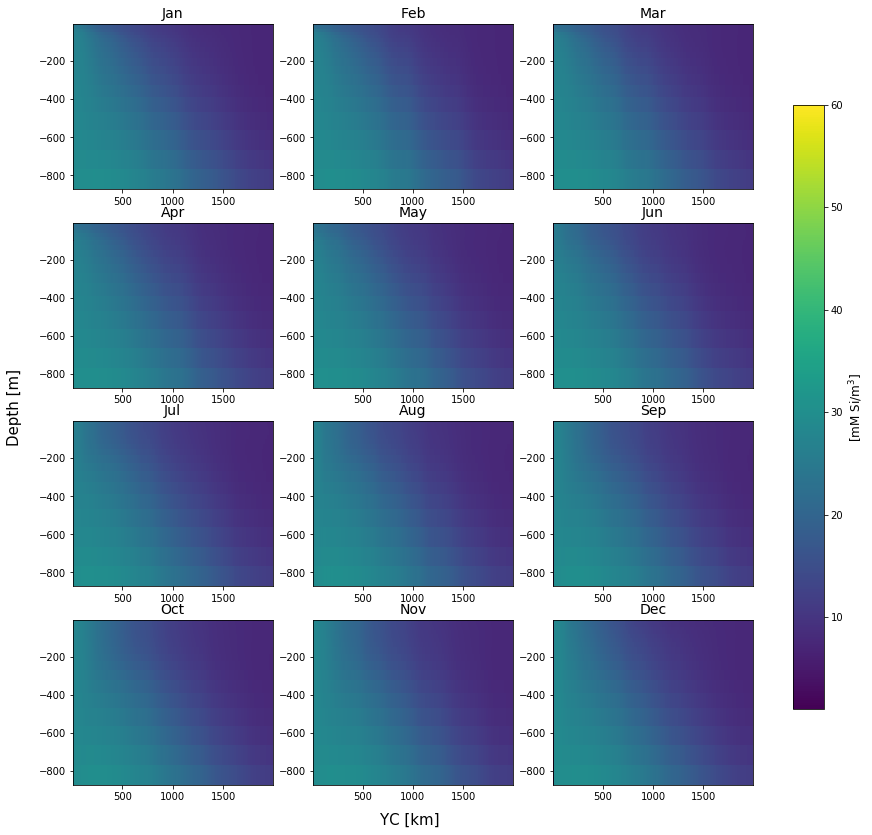

In [26]:
nz = 20

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(14,14))
cax = axes[0,0].pcolormesh(sio2_trans.YC*1e-3, sio2_trans.Z[:nz], sio2_trans[0,:nz], 
                         vmin=1., vmax=6e1, 
                         rasterized=True)
axes[0,1].pcolormesh(sio2_trans.YC*1e-3, sio2_trans.Z[:nz], sio2_trans[1,:nz], 
                     vmin=1., vmax=6e1, 
                     rasterized=True)
axes[0,2].pcolormesh(sio2_trans.YC*1e-3, sio2_trans.Z[:nz], sio2_trans[2,:nz], 
                     vmin=1., vmax=6e1, 
                     rasterized=True)

axes[1,0].pcolormesh(sio2_trans.YC*1e-3, sio2_trans.Z[:nz], sio2_trans[3,:nz], 
                     vmin=1., vmax=6e1, 
                     rasterized=True)
axes[1,1].pcolormesh(sio2_trans.YC*1e-3, sio2_trans.Z[:nz], sio2_trans[4,:nz], 
                     vmin=1., vmax=6e1, 
                     rasterized=True)
axes[1,2].pcolormesh(sio2_trans.YC*1e-3, sio2_trans.Z[:nz], sio2_trans[5,:nz], 
                     vmin=1., vmax=6e1, 
                     rasterized=True)

axes[2,0].pcolormesh(sio2_trans.YC*1e-3, sio2_trans.Z[:nz], sio2_trans[6,:nz], 
                     vmin=1., vmax=6e1, 
                     rasterized=True)
axes[2,1].pcolormesh(sio2_trans.YC*1e-3, sio2_trans.Z[:nz], sio2_trans[7,:nz], 
                     vmin=1., vmax=6e1, 
                     rasterized=True)
axes[2,2].pcolormesh(sio2_trans.YC*1e-3, sio2_trans.Z[:nz], sio2_trans[8,:nz], 
                     vmin=1., vmax=6e1, 
                     rasterized=True)

axes[3,0].pcolormesh(sio2_trans.YC*1e-3, sio2_trans.Z[:nz], sio2_trans[9,:nz], 
                     vmin=1., vmax=6e1, 
                     rasterized=True)
axes[3,1].pcolormesh(sio2_trans.YC*1e-3, sio2_trans.Z[:nz], sio2_trans[10,:nz], 
                     vmin=1., vmax=6e1, 
                     rasterized=True)
axes[3,2].pcolormesh(sio2_trans.YC*1e-3, sio2_trans.Z[:nz], sio2_trans[11,:nz], 
                     vmin=1., vmax=6e1, 
                     rasterized=True)

axes[0,0].set_title('Jan',fontsize=14)
axes[0,1].set_title('Feb',fontsize=14)
axes[0,2].set_title('Mar',fontsize=14)
axes[1,0].set_title('Apr',fontsize=14)
axes[1,1].set_title('May',fontsize=14)
axes[1,2].set_title('Jun',fontsize=14)
axes[2,0].set_title('Jul',fontsize=14)
axes[2,1].set_title('Aug',fontsize=14)
axes[2,2].set_title('Sep',fontsize=14)
axes[3,0].set_title('Oct',fontsize=14)
axes[3,1].set_title('Nov',fontsize=14)
axes[3,2].set_title('Dec',fontsize=14)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
cbar = fig.colorbar(cax, cax=cbar_ax)
cbar.set_label(r'[mM Si/m$^3$]',fontsize=12)

fig.text(0.06, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=15)
fig.text(0.43, 0.09, 'YC [km]', 
         va='center', rotation='horizontal', fontsize=15)

plt.savefig(op.join(ddir,'SiO2_3D2804_monthlyclim_40-65S.pdf'))

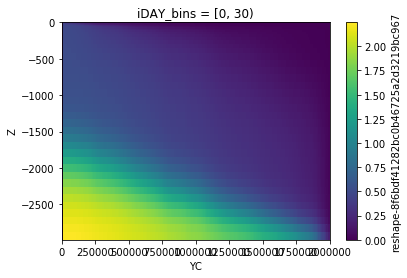

In [29]:
po4_trans[0].plot()

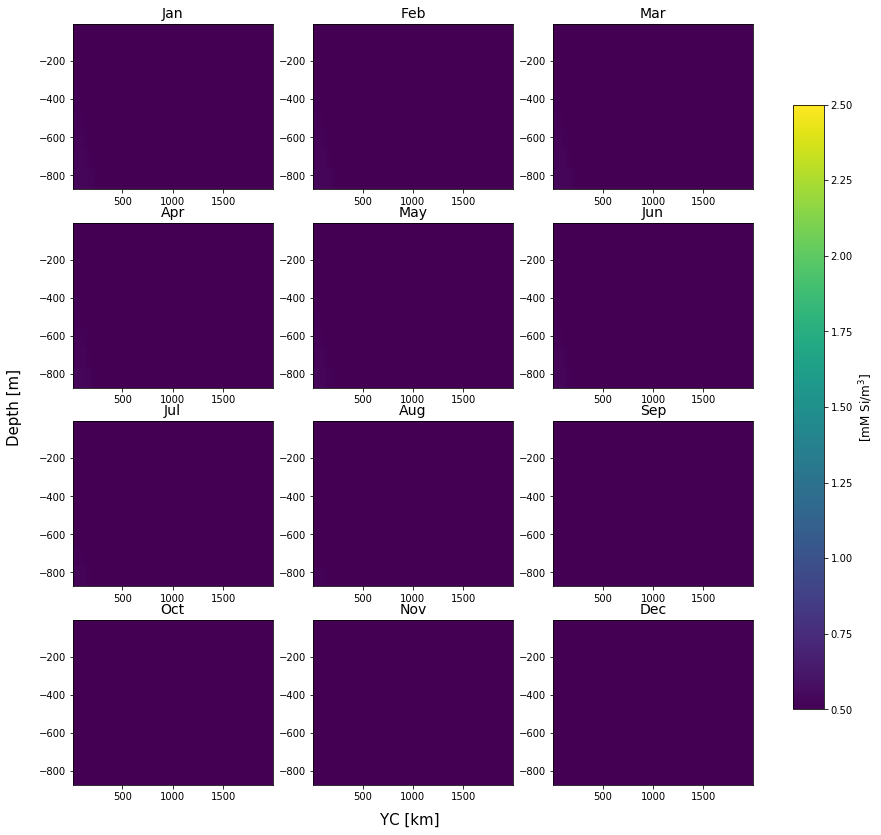

In [27]:
nz = 20

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(14,14))
cax = axes[0,0].pcolormesh(po4_trans.YC*1e-3, po4_trans.Z[:nz], po4_trans[0,:nz], 
                         vmin=.5, vmax=2.5, 
                         rasterized=True)
axes[0,1].pcolormesh(po4_trans.YC*1e-3, po4_trans.Z[:nz], po4_trans[1,:nz], 
                     vmin=.5, vmax=2.5, 
                     rasterized=True)
axes[0,2].pcolormesh(po4_trans.YC*1e-3, po4_trans.Z[:nz], po4_trans[2,:nz], 
                     vmin=.5, vmax=2.5, 
                     rasterized=True)

axes[1,0].pcolormesh(po4_trans.YC*1e-3, po4_trans.Z[:nz], po4_trans[3,:nz], 
                     vmin=.5, vmax=2.5, 
                     rasterized=True)
axes[1,1].pcolormesh(po4_trans.YC*1e-3, po4_trans.Z[:nz], po4_trans[4,:nz], 
                     vmin=.5, vmax=2.5,
                     rasterized=True)
axes[1,2].pcolormesh(po4_trans.YC*1e-3, po4_trans.Z[:nz], po4_trans[5,:nz], 
                     vmin=.5, vmax=2.5, 
                     rasterized=True)

axes[2,0].pcolormesh(po4_trans.YC*1e-3, po4_trans.Z[:nz], po4_trans[6,:nz], 
                     vmin=.5, vmax=2.5, 
                     rasterized=True)
axes[2,1].pcolormesh(po4_trans.YC*1e-3, po4_trans.Z[:nz], po4_trans[7,:nz], 
                     vmin=.5, vmax=2.5, 
                     rasterized=True)
axes[2,2].pcolormesh(po4_trans.YC*1e-3, po4_trans.Z[:nz], po4_trans[8,:nz], 
                     vmin=.5, vmax=2.5, 
                     rasterized=True)

axes[3,0].pcolormesh(po4_trans.YC*1e-3, po4_trans.Z[:nz], po4_trans[9,:nz], 
                     vmin=.5, vmax=2.5, 
                     rasterized=True)
axes[3,1].pcolormesh(po4_trans.YC*1e-3, po4_trans.Z[:nz], po4_trans[10,:nz], 
                     vmin=.5, vmax=2.5, 
                     rasterized=True)
axes[3,2].pcolormesh(po4_trans.YC*1e-3, po4_trans.Z[:nz], po4_trans[11,:nz], 
                     vmin=.5, vmax=2.5, 
                     rasterized=True)

axes[0,0].set_title('Jan',fontsize=14)
axes[0,1].set_title('Feb',fontsize=14)
axes[0,2].set_title('Mar',fontsize=14)
axes[1,0].set_title('Apr',fontsize=14)
axes[1,1].set_title('May',fontsize=14)
axes[1,2].set_title('Jun',fontsize=14)
axes[2,0].set_title('Jul',fontsize=14)
axes[2,1].set_title('Aug',fontsize=14)
axes[2,2].set_title('Sep',fontsize=14)
axes[3,0].set_title('Oct',fontsize=14)
axes[3,1].set_title('Nov',fontsize=14)
axes[3,2].set_title('Dec',fontsize=14)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
cbar = fig.colorbar(cax, cax=cbar_ax)
cbar.set_label(r'[mM Si/m$^3$]',fontsize=12)

fig.text(0.06, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=15)
fig.text(0.43, 0.09, 'YC [km]', 
         va='center', rotation='horizontal', fontsize=15)

plt.savefig(op.join(ddir,'PO4_3D2804_monthlyclim_40-65S.pdf'))

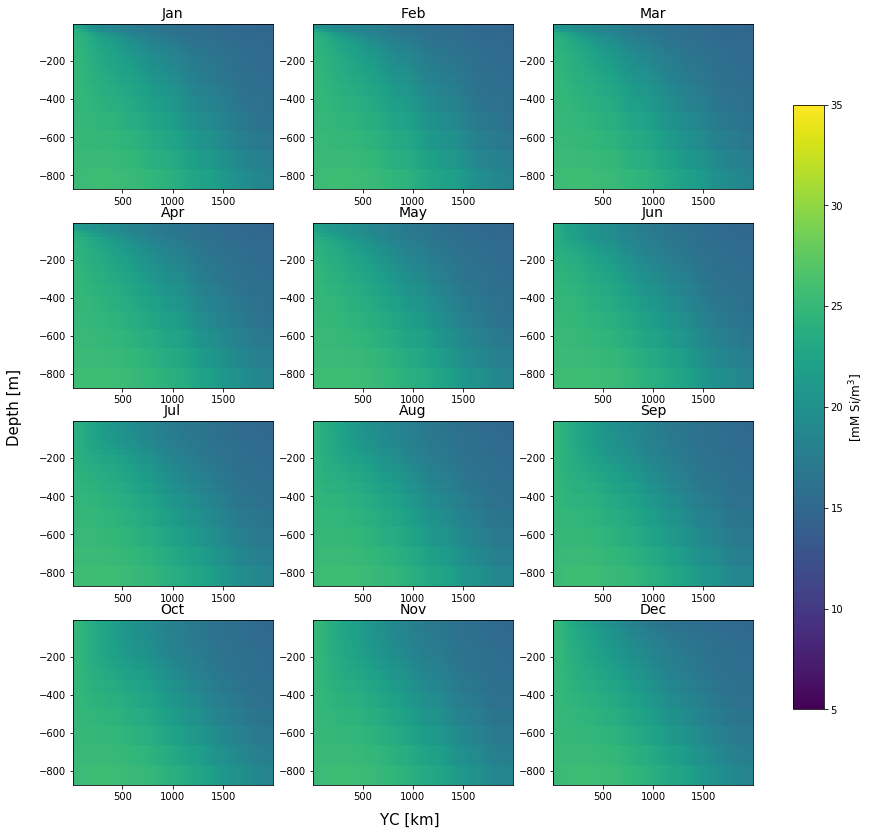

In [31]:
nz = 20

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(14,14))
cax = axes[0,0].pcolormesh(no3_trans.YC*1e-3, no3_trans.Z[:nz], no3_trans[0,:nz], 
                         vmin=5., vmax=35.,
                         rasterized=True)
axes[0,1].pcolormesh(no3_trans.YC*1e-3, no3_trans.Z[:nz], no3_trans[1,:nz], 
                     vmin=5., vmax=35., 
                     rasterized=True)
axes[0,2].pcolormesh(no3_trans.YC*1e-3, no3_trans.Z[:nz], no3_trans[2,:nz], 
                     vmin=5., vmax=35., 
                     rasterized=True)

axes[1,0].pcolormesh(no3_trans.YC*1e-3, no3_trans.Z[:nz], no3_trans[3,:nz], 
                     vmin=5., vmax=35., 
                     rasterized=True)
axes[1,1].pcolormesh(no3_trans.YC*1e-3, no3_trans.Z[:nz], no3_trans[4,:nz], 
                     vmin=5., vmax=35.,
                     rasterized=True)
axes[1,2].pcolormesh(no3_trans.YC*1e-3, no3_trans.Z[:nz], no3_trans[5,:nz], 
                     vmin=5., vmax=35., 
                     rasterized=True)

axes[2,0].pcolormesh(no3_trans.YC*1e-3, no3_trans.Z[:nz], no3_trans[6,:nz], 
                     vmin=5., vmax=35., 
                     rasterized=True)
axes[2,1].pcolormesh(no3_trans.YC*1e-3, no3_trans.Z[:nz], no3_trans[7,:nz], 
                     vmin=5., vmax=35., 
                     rasterized=True)
axes[2,2].pcolormesh(no3_trans.YC*1e-3, no3_trans.Z[:nz], no3_trans[8,:nz], 
                     vmin=5., vmax=35., 
                     rasterized=True)

axes[3,0].pcolormesh(no3_trans.YC*1e-3, no3_trans.Z[:nz], no3_trans[9,:nz], 
                     vmin=5., vmax=35., 
                     rasterized=True)
axes[3,1].pcolormesh(no3_trans.YC*1e-3, no3_trans.Z[:nz], no3_trans[10,:nz], 
                     vmin=5., vmax=35., 
                     rasterized=True)
axes[3,2].pcolormesh(no3_trans.YC*1e-3, no3_trans.Z[:nz], no3_trans[11,:nz], 
                     vmin=5., vmax=35., 
                     rasterized=True)

axes[0,0].set_title('Jan',fontsize=14)
axes[0,1].set_title('Feb',fontsize=14)
axes[0,2].set_title('Mar',fontsize=14)
axes[1,0].set_title('Apr',fontsize=14)
axes[1,1].set_title('May',fontsize=14)
axes[1,2].set_title('Jun',fontsize=14)
axes[2,0].set_title('Jul',fontsize=14)
axes[2,1].set_title('Aug',fontsize=14)
axes[2,2].set_title('Sep',fontsize=14)
axes[3,0].set_title('Oct',fontsize=14)
axes[3,1].set_title('Nov',fontsize=14)
axes[3,2].set_title('Dec',fontsize=14)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
cbar = fig.colorbar(cax, cax=cbar_ax)
cbar.set_label(r'[mM Si/m$^3$]',fontsize=12)

fig.text(0.06, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=15)
fig.text(0.43, 0.09, 'YC [km]', 
         va='center', rotation='horizontal', fontsize=15)

plt.savefig(op.join(ddir,'NO3_3D2804_monthlyclim_40-65S.pdf'))